In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy.signal import savgol_filter

# %matplotlib widget

In [2]:
def LDAP_to_time(timestamp):

    if type(timestamp) == pd._libs.tslibs.timestamps.Timestamp:
        return timestamp

    else:
        value = datetime.datetime(1601, 1, 1) + datetime.timedelta(seconds=timestamp/10000000)
        return value


def modifyTimestamps(df):

    df = df.dropna()
    df = df.drop(df.filter(regex='Name..').columns, axis=1)
    df = df.rename(columns={"Name": "Time"})
    df['Time'] = df['Time'].map(lambda x: LDAP_to_time(x))

    return df


def plotSimulation(df, timeStart=None, timeEnd=None):

    if timeStart == None:   timeStart = df.iloc[0]['Time']
    if timeEnd == None:     timeEnd = df.iloc[-1]['Time']
    print(f'Plotting from "{timeStart}" to "{timeEnd}"')
        

    U1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['U_L1real']
    U1 = savgol_filter(x=U1, window_length=10, polyorder=5)

    I1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['I_L1real']
    I1 = savgol_filter(x=I1, window_length=10, polyorder=5)

    time = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['Time']


    fig = plt.figure(figsize=(16, 8))
    plt.plot(time, U1, label='Voltage', c='orange')
    plt.plot(time, I1, label='Current', c='k')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f'))
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.show()

Plotting from "2024-02-23 11:43:8.7" to "2024-02-23 11:43:8.9"


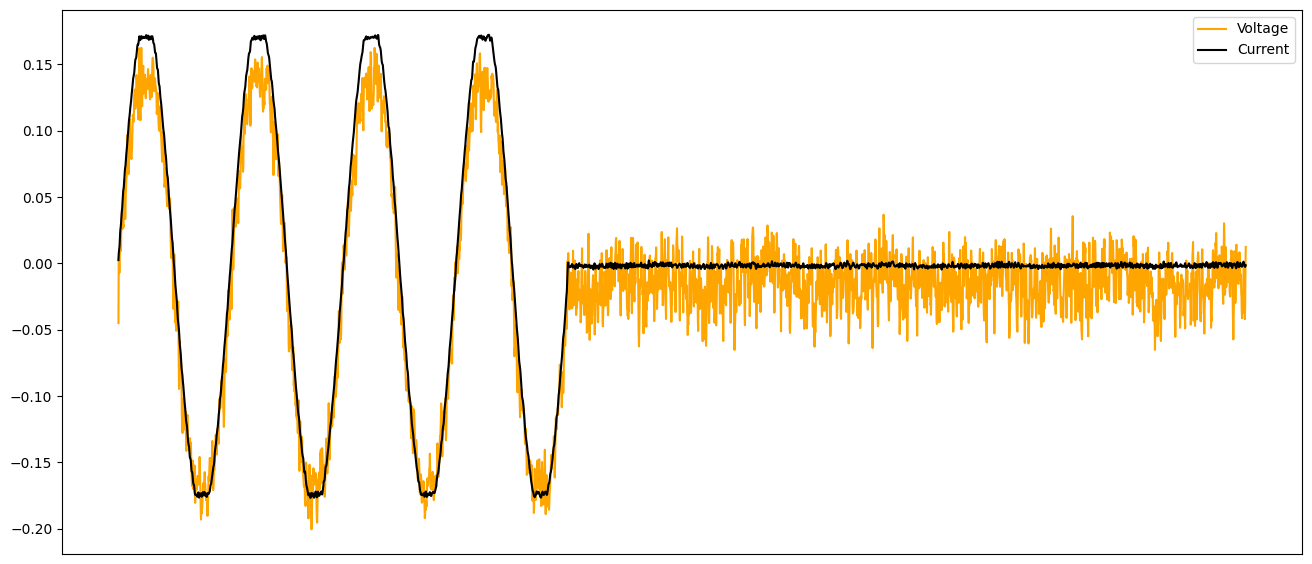

In [3]:
powerFailureDf = pd.read_csv('Power Anomalies Simulations Data/AD3_data/01_Power_failure_10sec.csv', sep=';')
powerFailureDf = modifyTimestamps(df=powerFailureDf)

plotSimulation(df=powerFailureDf, timeStart='2024-02-23 11:43:8.7', timeEnd='2024-02-23 11:43:8.9')

Plotting from "2024-02-23 11:50:08.257000" to "2024-02-23 11:50:08.4"


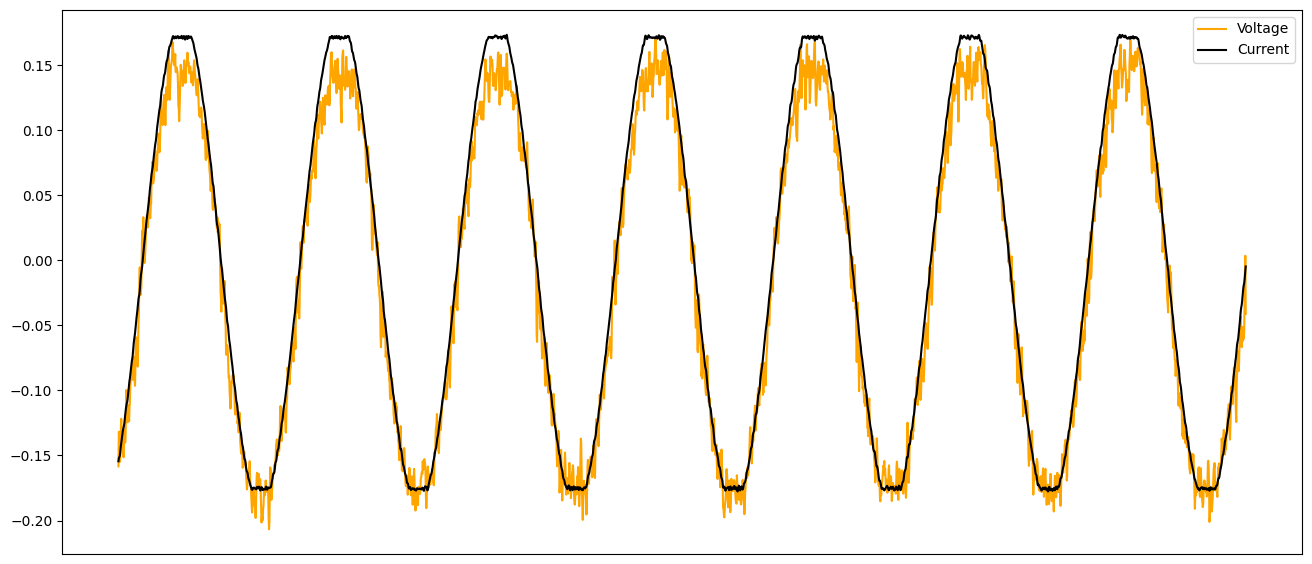

In [4]:
powerSagDf = pd.read_csv('Power Anomalies Simulations Data/AD3_data/02_Power_sag_5sec.csv', sep=';')
powerSagDf = modifyTimestamps(df=powerSagDf)

plotSimulation(df=powerSagDf, timeEnd='2024-02-23 11:50:08.4')

Plotting from "2024-02-23 11:56:02.85" to "2024-02-23 11:56:03.15"


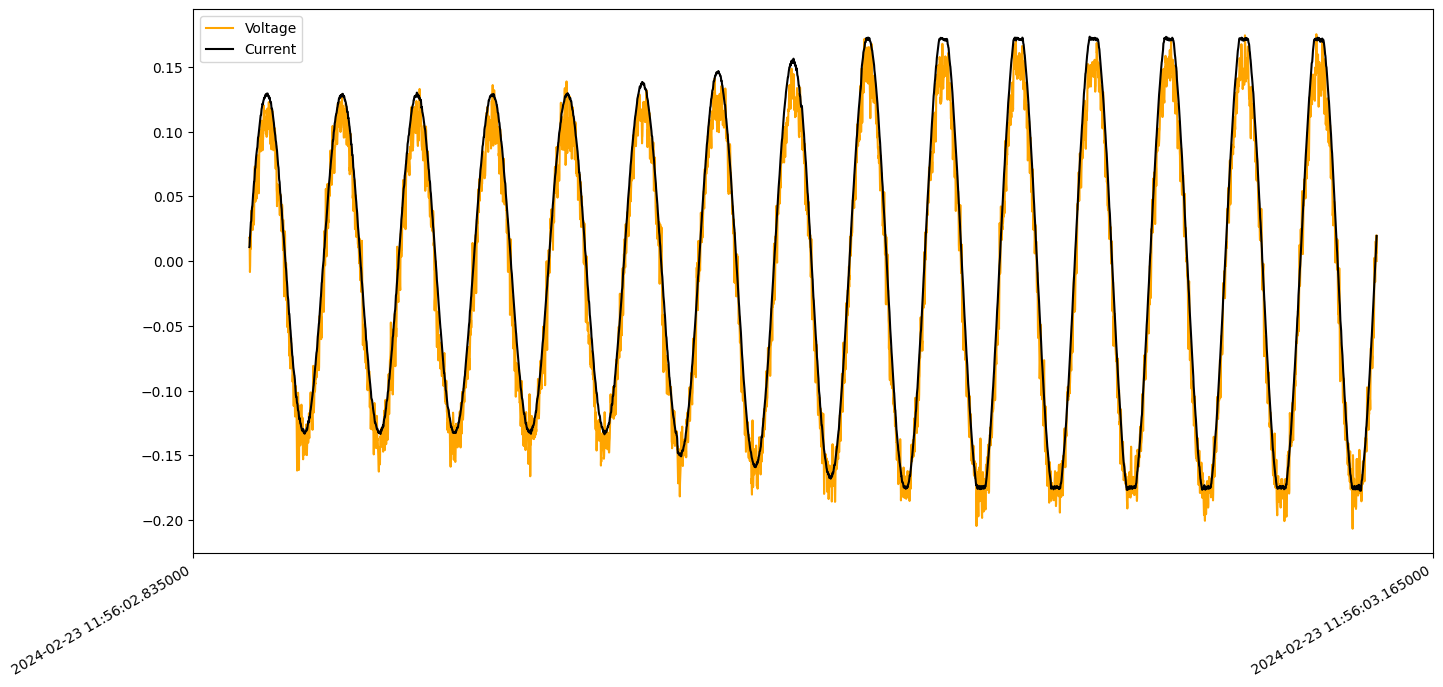

In [5]:
powerSpikeDf = pd.read_csv('Power Anomalies Simulations Data/AD3_data/03_Power_spike_5sec.csv', sep=';')
powerSpikeDf = modifyTimestamps(df=powerSpikeDf)

plotSimulation(df=powerSpikeDf, timeStart='2024-02-23 11:56:02.85', timeEnd='2024-02-23 11:56:03.15')

Plotting from "2024-02-23 11:42:46.507000" to "2024-02-23 11:42:46.8"


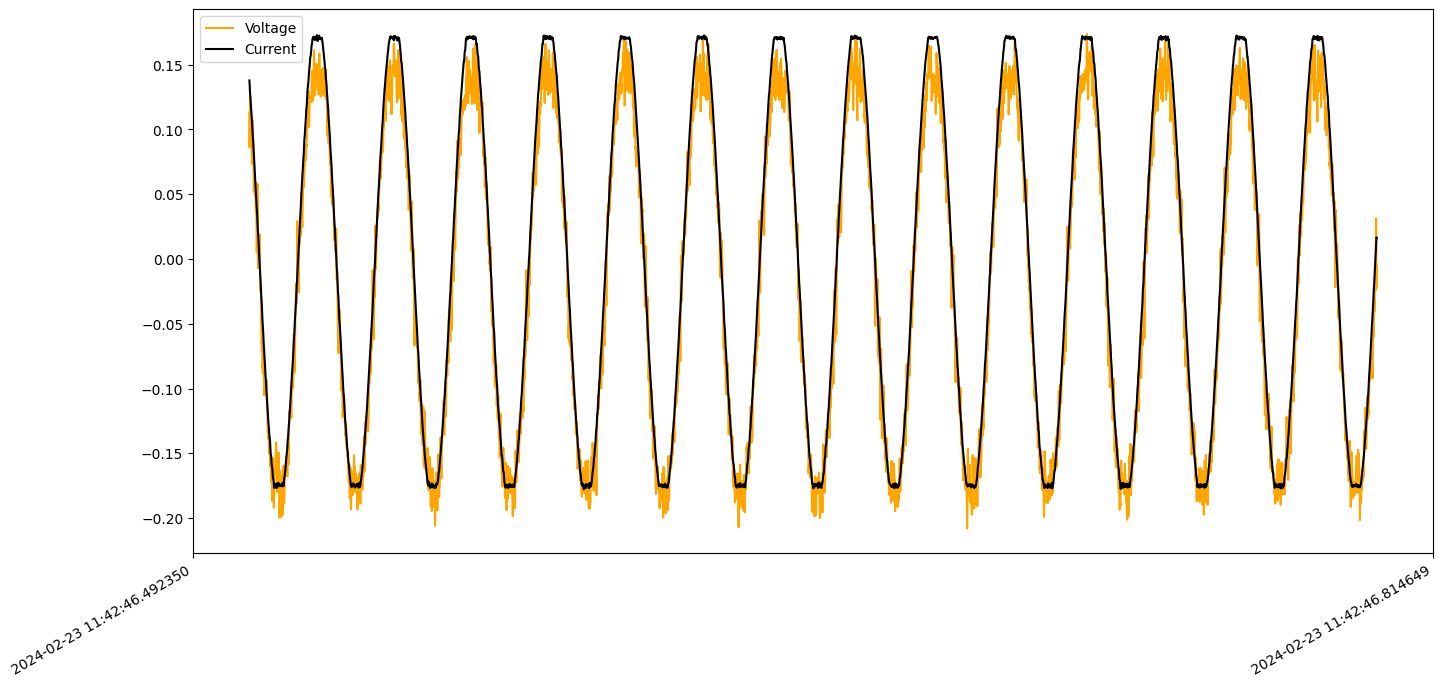

In [6]:
df = powerFailureDf

# timeStart = '2024-02-23 11:43:8.7'
timeEnd = '2024-02-23 11:42:46.8'

timeStart = None
# timeEnd = None

if timeStart == None:   timeStart = df.iloc[0]['Time']
if timeEnd == None:     timeEnd = df.iloc[-1]['Time']
print(f'Plotting from "{timeStart}" to "{timeEnd}"')

U1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['U_L1real']
U1 = savgol_filter(x=U1, window_length=10, polyorder=5)

I1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['I_L1real']
I1 = savgol_filter(x=I1, window_length=10, polyorder=5)

time = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['Time']


fig = plt.figure(figsize=(16, 8))
plt.plot(time, U1, label='Voltage', c='orange')
plt.plot(time, I1, label='Current', c='k')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [7]:
zero_crossings_V = list(np.where((-0.005 <= df['U_L1real']) & (df['U_L1real'] <= 0.005)))[0]
zero_crossings_I = list(np.where((-0.005 <= df['I_L1real']) & (df['I_L1real'] <= 0.005)))[0]

# Get the time stamps when V and I cross zero
time_stamps_V = df['Time'].iloc[zero_crossings_V]
time_stamps_I = df['Time'].iloc[zero_crossings_I]

# Compute the phase angle between V and I signals
td = pd.Timedelta(seconds=1)
time_delta = (time_stamps_V.iloc[0] - time_stamps_I.iloc[0]) / td

phase_angle_degrees = 360 * 50 * time_delta

phase_angle_degrees

-10.818

In [8]:
# df = pd.read_csv("Power Anomalies Simulations Data/synthetic_data/0_voltage_current_data.csv")
# type(df.iloc[0]['Timestamp'])

# df['Timestamp'] = df['Timestamp'].map(lambda x: pd.to_datetime(x, yearfirst=True))

In [9]:
# td = pd.Timedelta(seconds=1)

# zero_crossings_V = list(np.where((-0.005 <= df['Voltage (V)']) & (df['Voltage (V)'] <= 0.005)))[0]
# zero_crossings_I = list(np.where((-0.005 <= df['Current (A)']) & (df['Current (A)'] <= 0.005)))[0]

# # Get the time stamps when V and I cross zero
# time_stamps_V = df['Timestamp'].iloc[zero_crossings_V]
# time_stamps_I = df['Timestamp'].iloc[zero_crossings_I]

# # Compute the phase angle between V and I signals
# phase_angle = (time_stamps_V.iloc[0] - time_stamps_I.iloc[0]) / td

# phase_angle_degrees = 360 * 50 * phase_angle

# phase_angle_degrees

In [10]:
# import numpy as np
# from scipy.signal import butter,filtfilt
# # Filter requirements.
# T = 15.0         # Sample Period
# fs = 30.0       # sample rate, Hz
# cutoff = 3     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
# nyq = 0.5 * fs  # Nyquist Frequency
# order = 2       # sin wave can be approx represented as quadratic
# n = int(T * fs) # total number of samples

# t = np.linspace(0, T, n)

In [11]:
# # sin wave
# sig = np.sin(1.2*2*np.pi*t)
# # Lets add some noise
# noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
# data = sig + noise

In [12]:
# def butter_lowpass_filter(data, cutoff, fs, order):
#     normal_cutoff = cutoff / nyq
#     # Get the filter coefficients 
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data)
#     return y

In [13]:
# import plotly.graph_objects as go

# # Filter the data, and plot both the original and filtered signals.
# y = butter_lowpass_filter(data, cutoff, fs, order)
# fig = go.Figure()
# fig.add_trace(go.Scatter(
#             y = data,
#             line =  dict(shape =  'spline' ),
#             name = 'signal with noise'
#             ))
# fig.add_trace(go.Scatter(
#             y = y,
#             line =  dict(shape =  'spline' ),
#             name = 'filtered signal'
#             ))
# fig.show()

Plotting from "2024-02-23 11:42:46.507000" to "2024-02-23 11:42:46.8"


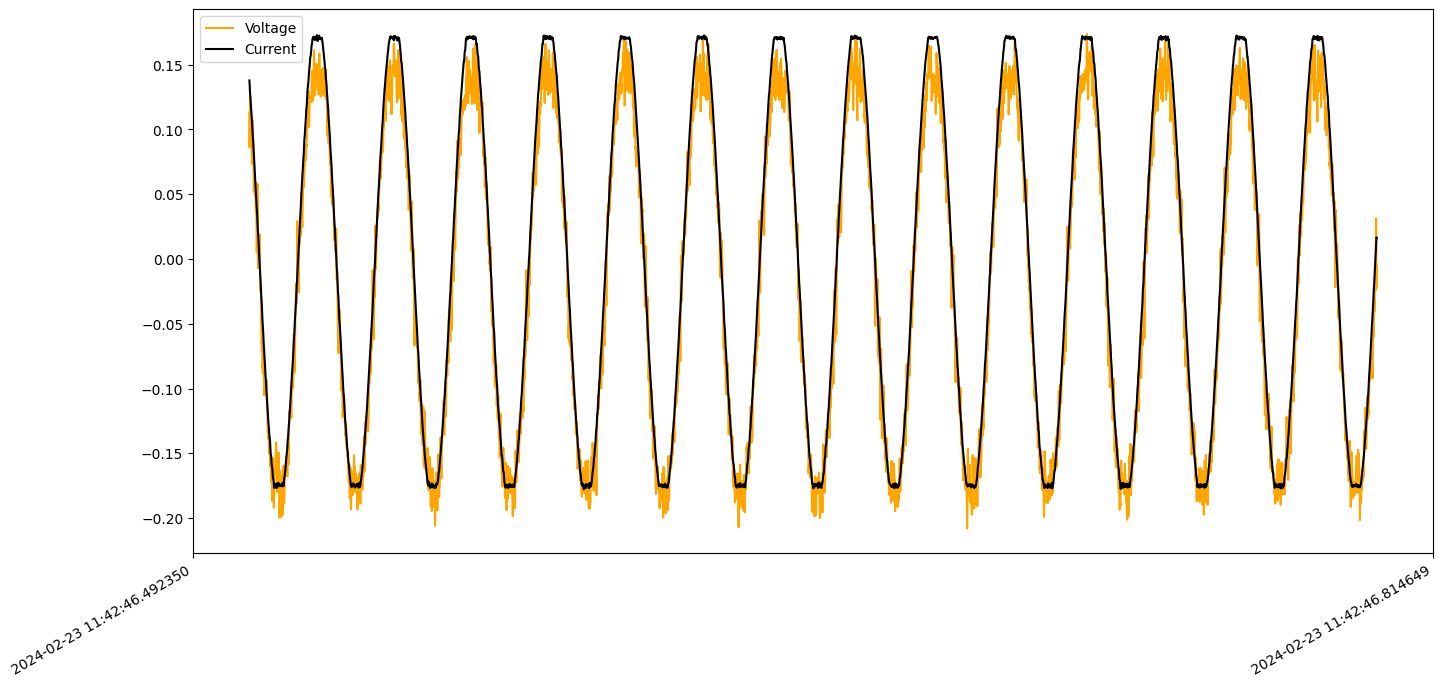

In [14]:
df = powerFailureDf

# timeStart = '2024-02-23 11:43:8.7'
timeEnd = '2024-02-23 11:42:46.8'

timeStart = None
# timeEnd = None

if timeStart == None:   timeStart = df.iloc[0]['Time']
if timeEnd == None:     timeEnd = df.iloc[-1]['Time']
print(f'Plotting from "{timeStart}" to "{timeEnd}"')

U1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['U_L1real']
U1 = savgol_filter(x=U1, window_length=10, polyorder=5)

I1 = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['I_L1real']
I1 = savgol_filter(x=I1, window_length=10, polyorder=5)

time = df[(df['Time'] >= timeStart) & (df['Time'] <= timeEnd)]['Time']


fig = plt.figure(figsize=(16, 8))
plt.plot(time, U1, label='Voltage', c='orange')
plt.plot(time, I1, label='Current', c='k')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S.%f'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [15]:
import numpy as np
from scipy.signal import butter,filtfilt

# Filter requirements.
fs = 20000.0       # sample rate, Hz
cutoff = 100     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic


def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


import plotly.graph_objects as go

# Filter the data, and plot both the original and filtered signals.
U1_filt = butter_lowpass_filter(data=U1, cutoff=cutoff, fs=fs, order=order)
I1_filt = butter_lowpass_filter(data=I1, cutoff=cutoff, fs=fs, order=order)

fig = go.Figure()

fig.add_trace(go.Scatter(
            # x = time.to_numpy(),
            y = U1,
            line =  dict(shape =  'spline', color = 'lightskyblue'),
            name = 'Noisy U1',
            ))

fig.add_trace(go.Scatter(
            y = U1_filt,
            line =  dict(shape =  'spline', color = 'darkslategrey'),
            name = 'Filtered U1'
            ))

fig.show()

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(
            y = I1,
            line =  dict(shape =  'spline', color = 'lightsalmon'),
            name = 'Noisy U1',
            ))

fig.add_trace(go.Scatter(
            y = I1_filt,
            line =  dict(shape =  'spline', color = 'darkslategrey'),
            name = 'Noisy U1',
            ))

fig.show()

In [17]:
print(time.shape)
print(U1.shape)
print(U1_filt.shape)

print(type(U1))
print(type(U1_filt))
print(type(time.to_numpy()))

(5861,)
(5861,)
(5861,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
#create NumPy array
my_array = np.array([2, 2, 4, 5, 7, 9, 11, 12, 3, 19])

#get index of values greater than 10
list(np.asarray(my_array>10).nonzero())[0]

array([6, 7, 9], dtype=int64)

In [19]:
time = time.to_numpy()

zero_crossings_V_filt = list(np.asarray((-0.0025 <= U1_filt) & (U1_filt <= 0.0025)).nonzero())[0]
zero_crossings_I_filt = list(np.asarray((-0.0025 <= I1_filt) & (I1_filt <= 0.0025)).nonzero())[0]

# Get the time stamps when V and I cross zero
time_stamps_V = time[zero_crossings_V_filt]
time_stamps_I = time[zero_crossings_I_filt]

# Compute the phase angle between V and I signals
td = pd.Timedelta(seconds=1)
time_delta = (time_stamps_V[0] - time_stamps_I[0]) / td

phase_angle_degrees = 360 * 50 * time_delta

phase_angle_degrees

-4.5

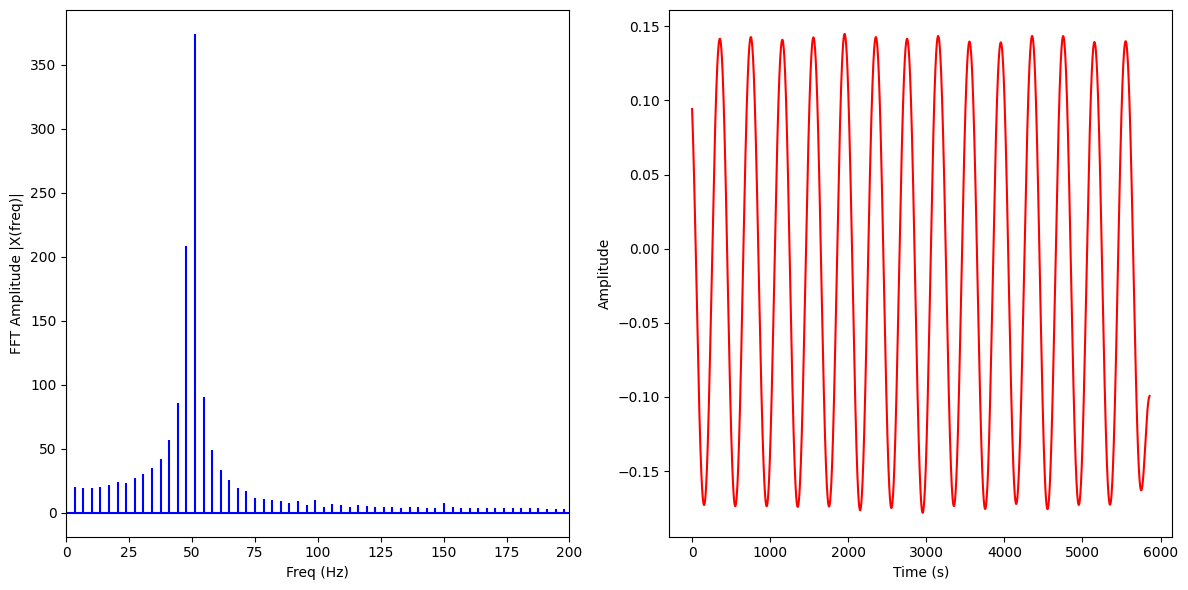

In [45]:
# from numpy.fft import fft, ifft
from scipy.fft import fft, ifft

x = U1_filt
sr = 20000

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 200)

plt.subplot(122)
plt.plot(ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [35]:
print(freq.shape)
print(X.shape)

print(freq)
print(np.abs(X))

type(X)

print(np.abs(X)[45:55])

(5861,)
(5861,)
[0.00000000e+00 3.41238696e+00 6.82477393e+00 ... 1.99897628e+04
 1.99931752e+04 1.99965876e+04]
[106.43350187  19.85702029  19.03704227 ...  19.4473114   19.03704227
  19.85702029]
[4.27213407 4.09161287 3.91283825 3.90294491 3.72955232 3.77889561
 3.59029794 3.50650888 3.56153178 3.44022331]


In [41]:
freq_list = list(np.asarray(((45 <= freq) & (freq >= 55)).nonzero()))[0]

freq_list.shape

(5844,)

In [43]:
fft_amplitudes = np.abs(X)

freq_list = list(np.asarray((fft_amplitudes == np.max(fft_amplitudes)).nonzero()))[0]

freq[freq_list]

array([   51.18580447, 19948.81419553])